## First import the modules networkx and matplotlib
### Networkx module to read the data sets in a graphical format
### Matplotlib to visualize the data sets

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

### Read and load the file facebook_comments.txt into memory

In [2]:
FbGraph = nx.read_edgelist('facebook_combined.txt.gz')

### Get basic information for FbGraph

In [3]:
print(nx.info(FbGraph))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


### Get Number of Nodes for FbGraph

In [4]:
print(nx.number_of_nodes(FbGraph))

4039


### Get Number of Edges for FbGraph

In [5]:
print(nx.number_of_edges(FbGraph))

88234


### Check if the FbGraph is directional or not

In [6]:
print(nx.is_directed(FbGraph))

False


## Now we will read a dot net file. 
## Dot net file is basically a pajek format

In [7]:
footballGraph = nx.read_pajek('football.net')

### Get basic info for footballGraph

In [8]:
print(nx.info(footballGraph))

Name: 
Type: MultiDiGraph
Number of nodes: 35
Number of edges: 118
Average in degree:   3.3714
Average out degree:   3.3714


### Get number of nodes for footballGraph

In [9]:
print(nx.number_of_nodes(footballGraph))

35


### Get number of edges for footballGraph

In [10]:
print(nx.number_of_edges(footballGraph))

118


### Check if the footbalGraph is directional

In [11]:
print(nx.is_directed(footballGraph))

True


## Analyze another file in pajek format

In [12]:
karate_pajek_Graph = nx.read_pajek('karate.paj')

## Get the basic info for karate_pajek_Graph

In [13]:
print(nx.info(karate_pajek_Graph))

Name: 
Type: MultiGraph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


### Get number of nodes for karate_pajek_Graph 

In [14]:
print(nx.number_of_nodes(karate_pajek_Graph))

34


### Get number of edges for karate_pajek_Graph

In [15]:
print(nx.number_of_edges(karate_pajek_Graph))

78


### Check if karate_pajek_Graph is directional

In [16]:
print(nx.is_directed(karate_pajek_Graph))

False


## Next we will analyze a graphml formal file

In [17]:
wiki_Graph = nx.read_graphml('vecwiki-20091230-manual-coding.graphml')

## Get basic info for wikiGraph

In [18]:
print(nx.info(wiki_Graph))

Name: 
Type: DiGraph
Number of nodes: 921
Number of edges: 1081
Average in degree:   1.1737
Average out degree:   1.1737


### Get number of nodes for wikiGraph

In [19]:
print(nx.number_of_nodes(wiki_Graph))

921


### Get number of edges for wikiGraph

In [20]:
print(nx.number_of_edges(wiki_Graph))

1081


### Check if the graph is directional

In [21]:
print(nx.is_directed(wiki_Graph))

True


## Next we will perform further analysis on karate_pajek_Graph

In [22]:
print(nx.info(karate_pajek_Graph))

Name: 
Type: MultiGraph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


## Let us visualize the karate_pajek_Graph

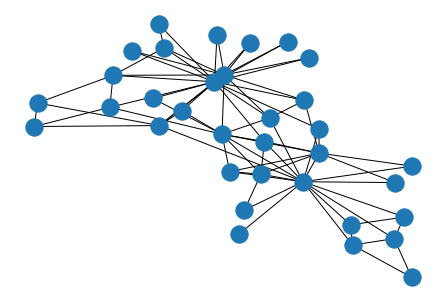

In [23]:
nx.draw(karate_pajek_Graph)
plt.show()

## Let us visualize a Directed Graph
### The footballGraph is a directed Graph

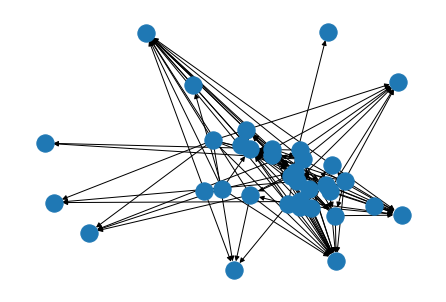

In [24]:
nx.draw(footballGraph)
plt.show()

## We will continue the rest of the analysis on karate_pajek_Graph

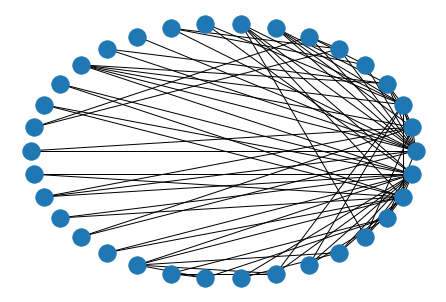

In [25]:
nx.draw_circular(karate_pajek_Graph)
plt.show()

### The draw_circular method will put all the nodes in a circular fashion, as we can see above.

## Now we will check the degree distribution.
### Degree distribution will show how many nodes have a particular degree

In [26]:
degree_of_each_node = nx.degree(karate_pajek_Graph)
degree_of_each_node

MultiDegreeView({'1': 16, '2': 9, '3': 10, '4': 6, '5': 3, '6': 4, '7': 4, '8': 4, '9': 5, '10': 2, '11': 3, '12': 1, '13': 2, '14': 5, '15': 2, '16': 2, '17': 2, '18': 2, '19': 2, '20': 3, '21': 2, '22': 2, '23': 2, '24': 5, '25': 3, '26': 3, '27': 2, '28': 4, '29': 3, '30': 4, '31': 4, '32': 6, '33': 12, '34': 17})

### Above, we are getting the degree of each individual node in the graph. But our aim is to count the total 
### occurence of a particular degree. But since this is a MultiDegreeView, so our aim cannot
### be achieved directly

In [27]:
type(degree_of_each_node)

networkx.classes.reportviews.MultiDegreeView

### We have to convert the type of degree_of_each_node to dict

In [28]:
degree_of_each_node = dict(degree_of_each_node)
degree_of_each_node

{'1': 16,
 '2': 9,
 '3': 10,
 '4': 6,
 '5': 3,
 '6': 4,
 '7': 4,
 '8': 4,
 '9': 5,
 '10': 2,
 '11': 3,
 '12': 1,
 '13': 2,
 '14': 5,
 '15': 2,
 '16': 2,
 '17': 2,
 '18': 2,
 '19': 2,
 '20': 3,
 '21': 2,
 '22': 2,
 '23': 2,
 '24': 5,
 '25': 3,
 '26': 3,
 '27': 2,
 '28': 4,
 '29': 3,
 '30': 4,
 '31': 4,
 '32': 6,
 '33': 12,
 '34': 17}

In [29]:
degree_of_each_node.values()

dict_values([16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17])

### Let us remove the dupliated values

In [30]:
set(degree_of_each_node.values())

{1, 2, 3, 4, 5, 6, 9, 10, 12, 16, 17}

In [31]:
def plot_deg_dist(G):

    all_degrees = dict(nx.degree(G))
    all_degree_values = list(all_degrees.values()) #Get all the degrees, i.e., individual degree of each individual node
    unique_degrees = list(set(all_degree_values)) #Get only the unique degrees. Remove the duplicacies
    
    count_of_degrees = []
    
    for i in unique_degrees:
        count = all_degree_values.count(i)
        count_of_degrees.append(count)
            
    plt.plot(unique_degrees,count_of_degrees, '-o')
    plt.xlabel('DEGREES')
    plt.ylabel('COUNT OF NODES')
    plt.title('DEGREE DISTRIBUTION OF GIVEN GRAPH')
    plt.show()

### Now we will call the above function

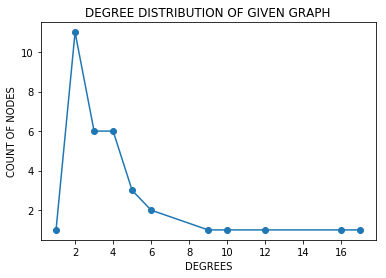

In [32]:
plot_deg_dist(karate_pajek_Graph)

### MOST OF THE REAL WORLD NETWORKS EXHIBIT POWER LAW DISTRIBUTIONS
### It means there are very few nodes which have very high degree AND there are lot of nodes which have very less degree

### Now let us check the log distribution

In [33]:
def plot_log_dist(G):

    all_degrees = dict(nx.degree(G))
    all_degree_values = list(all_degrees.values()) #Get all the degrees, i.e., individual degree of each individual node
    unique_degrees = list(set(all_degree_values)) #Get only the unique degrees. Remove the duplicacies
    
    count_of_degrees = []
    
    for i in unique_degrees:
        count = all_degree_values.count(i)
        count_of_degrees.append(count)
            
    plt.loglog(unique_degrees,count_of_degrees, '-o')
    plt.xlabel('DEGREES')
    plt.ylabel('COUNT OF NODES')
    plt.title('DEGREE DISTRIBUTION OF GIVEN GRAPH')
    plt.show()

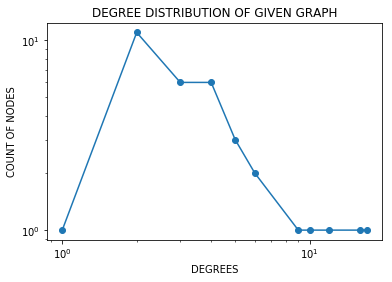

In [34]:
plot_log_dist(karate_pajek_Graph)

## Now we will check the density
### Density = Number of edges present/Total possible edges
### Total possible edges = n choose 2 OR nC2
### Where n is Number of NODES present

### In a simple graph, the density value will be between 0 and 1
### In an empty graph, the density will be ZERO
### In a complete graph, density will be 1
### In a multigraph, where MORE THAN 1 edges are allowed between 2 nodes, the density value can be more than one.

In [35]:
nx.density(karate_pajek_Graph)

0.13903743315508021

### Now let us check the density for a complete and an empty graph

In [36]:
C = nx.complete_graph(100)
nx.density(C)

1.0

In [37]:
E = nx.Graph()
E.add_nodes_from([1,2,3,4])
nx.density(E)

0

# Now let's check the clustering coefficient for wiki_graph

## Clustering Coefficient = Actual Number of friendships/ Total possible friendships

### For a given node, the clustering coefficient basically tells us the number of links that are present amongst the
### neighbours of this node with respect to the total number of links that can be possible

### Now let us find the lustering coefficient
### The cluster method returns a dictionary for all the nodes as keys and their respective clustering 
### coefficient as values. So we will iterate through the dict.

In [44]:
for i in nx.clustering(wiki_Graph).items():
    print(i)

('n0', 0)
('n1', 0.0017652544630961898)
('n2', 0.5)
('n3', 0.002526386705591736)
('n4', 0)
('n5', 0)
('n6', 0)
('n7', 0.0015725682724762196)
('n8', 0)
('n9', 0)
('n10', 0)
('n11', 0)
('n12', 1.0)
('n13', 0.04628355127322781)
('n14', 0)
('n15', 1.0)
('n16', 0)
('n17', 0)
('n18', 0.08863198458574181)
('n19', 0)
('n20', 0)
('n21', 0)
('n22', 1.0)
('n23', 0.021320637549161664)
('n24', 0)
('n25', 0)
('n26', 0)
('n27', 0.5)
('n28', 0.1827309236947791)
('n29', 0)
('n30', 0)
('n31', 1.0)
('n32', 0.04352678571428571)
('n33', 0)
('n34', 0)
('n35', 0)
('n36', 0)
('n37', 0.03896103896103896)
('n38', 0)
('n39', 0)
('n40', 0)
('n41', 0)
('n42', 0)
('n43', 0)
('n44', 0)
('n45', 0.5)
('n46', 0)
('n47', 0)
('n48', 0)
('n49', 0)
('n50', 0)
('n51', 0)
('n52', 0)
('n53', 0)
('n54', 0)
('n55', 0)
('n56', 0)
('n57', 0)
('n58', 0)
('n59', 0)
('n60', 0)
('n61', 0)
('n62', 0)
('n63', 0)
('n64', 1.0)
('n65', 0.25)
('n66', 0)
('n67', 0)
('n68', 0)
('n69', 0)
('n70', 0)
('n71', 0)
('n72', 0)
('n73', 0)
('n74', 0)

#### Let us Calculate the average clustering for wiki_graph

In [46]:
nx.average_clustering(wiki_Graph)

0.05264422330938973

### Now let us check the diameter property
#### Diameter is the maximum shortest path that we have to travel to go from one node to the other
#### In other words, it is the shortest path between two most distant nodes in the network

In [47]:
nx.diameter(karate_pajek_Graph)

5

### Its basically observed that in Real World Networks, the diameter is very less because the nodes are very well
### connected to each other and the distance between them is very small.